# 🚢 Assignment 4: Exploratory Data Analysis (EDA) on the Titanic Dataset

**Objective:**  
Perform an in-depth Exploratory Data Analysis (EDA) on the Titanic dataset to uncover insights, detect patterns, and understand the data structure.

**Dataset:**  
The Titanic dataset from Kaggle contains information about the passengers aboard the Titanic, such as age, gender, class, and whether they survived.

**Key Steps:**
✅ Load and clean the dataset (handle missing values, correct data types, remove duplicates)  
✅ Generate descriptive statistics (using `describe()`, `info()`, and `value_counts()`)  
✅ Visualize feature distributions (histograms, boxplots, count plots)  
✅ Use pair plots and correlation heatmaps to explore relationships between variables  
✅ Conduct group-wise analysis to examine survival rates across different features  
✅ Bonus: Create new features (like `FamilySize`), and add violin or swarm plots for deeper insights  

Let’s start exploring and uncover what the Titanic data can tell us! 🛳️


In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Checking missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column as it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Check again
df.isnull().sum()


C:\Users\nihal\AppData\Local\Temp\ipykernel_23232\2594978696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_23232\2594978696.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
# Convert to category for better memory and plotting
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 58.8+ KB


In [6]:
# Summary stats
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,3.0,3.0,491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


C:\Users\nihal\AppData\Local\Temp\ipykernel_23232\1789691943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


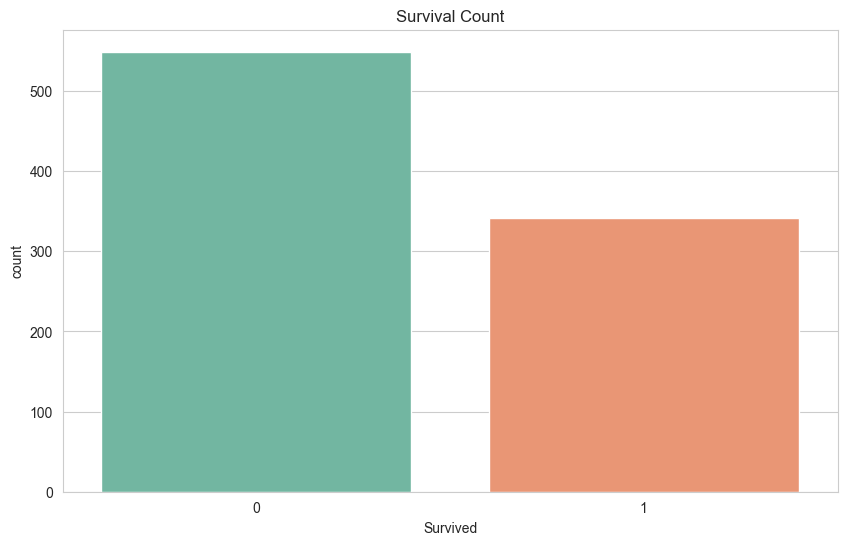

In [7]:
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count')
plt.show()


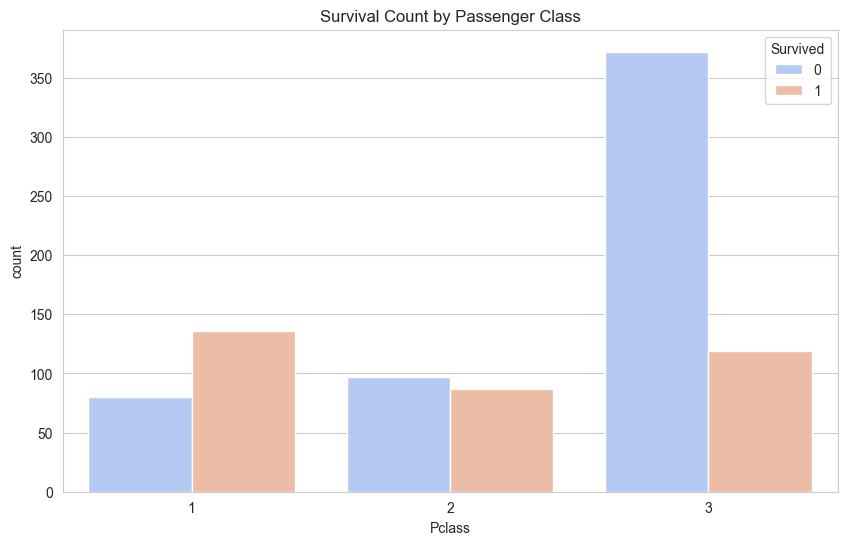

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Count by Passenger Class')
plt.show()


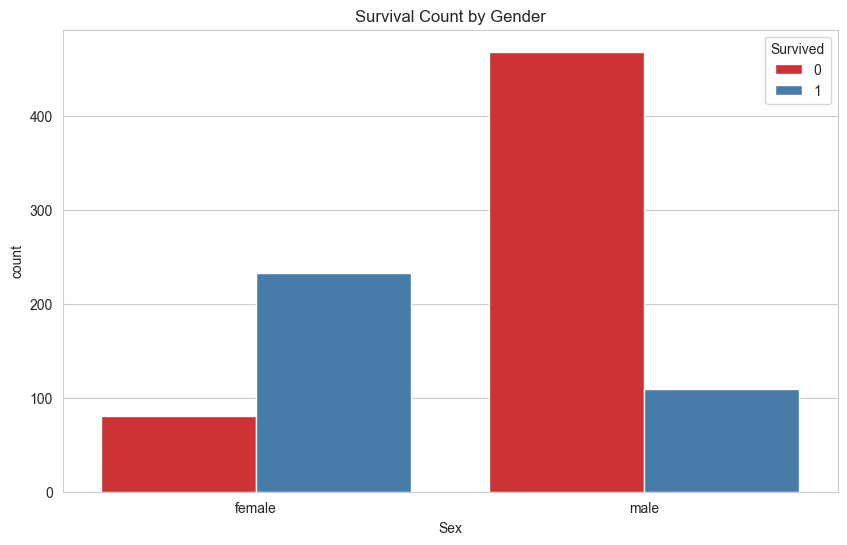

In [9]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by Gender')
plt.show()


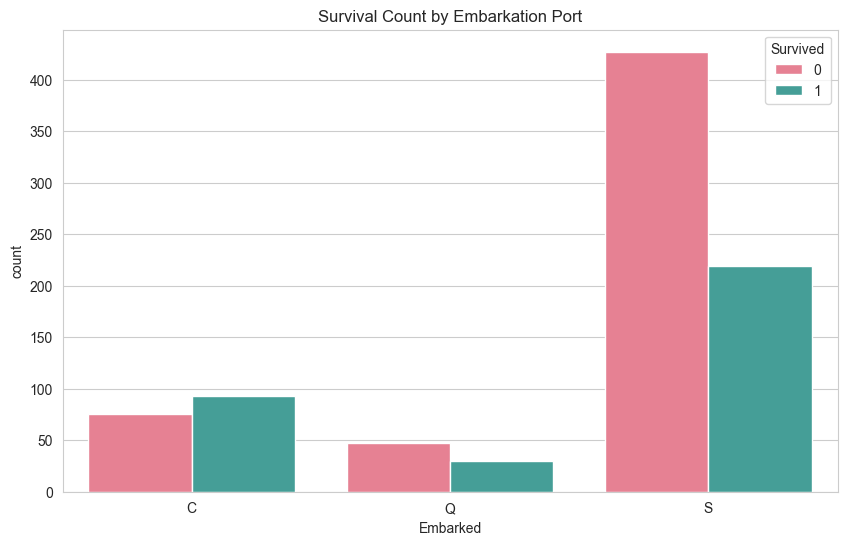

In [10]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette='husl')
plt.title('Survival Count by Embarkation Port')
plt.show()


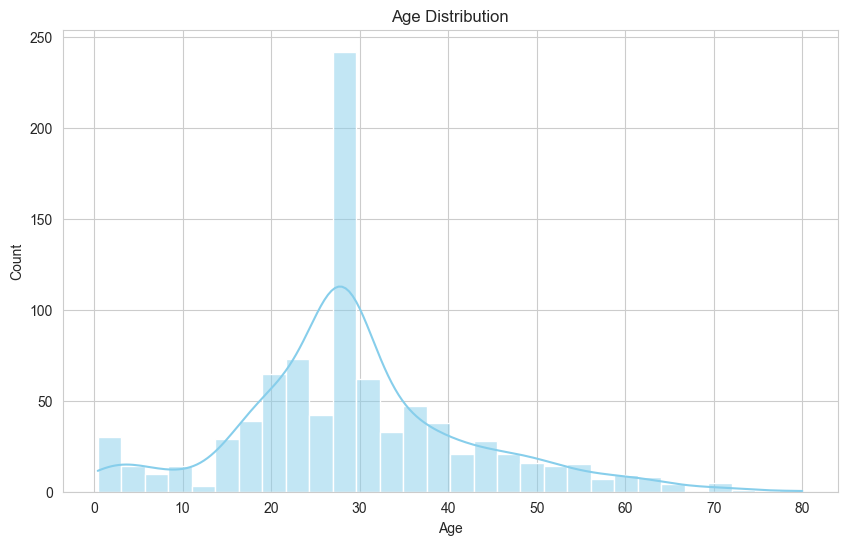

In [11]:
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()


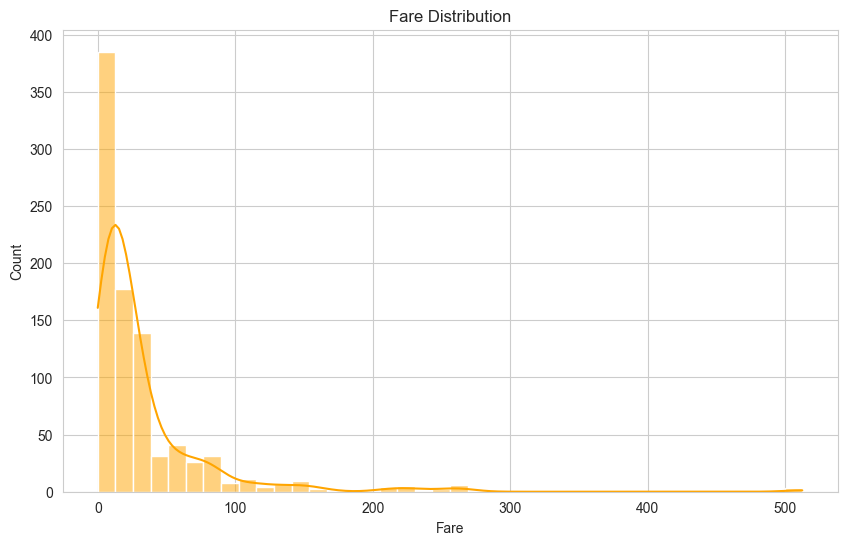

In [12]:
sns.histplot(df['Fare'], bins=40, kde=True, color='orange')
plt.title('Fare Distribution')
plt.show()


C:\Users\nihal\AppData\Local\Temp\ipykernel_23232\664921890.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')


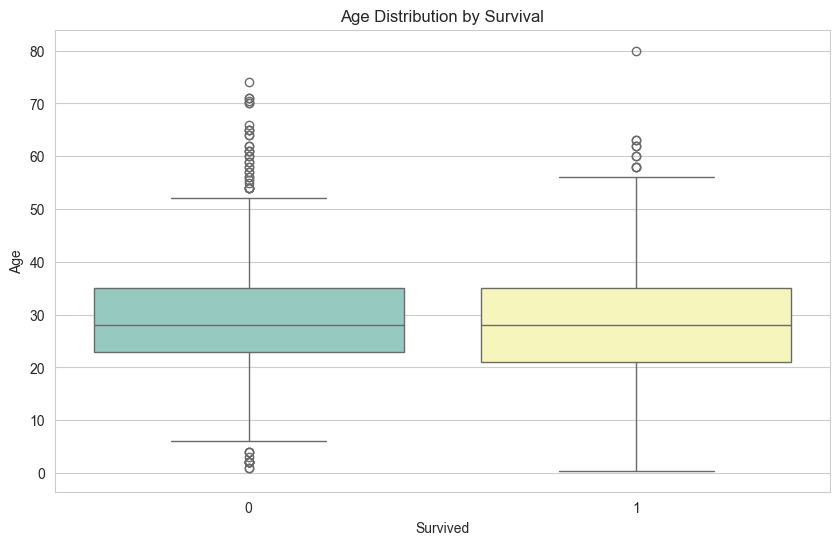

In [13]:
sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Survival')
plt.show()


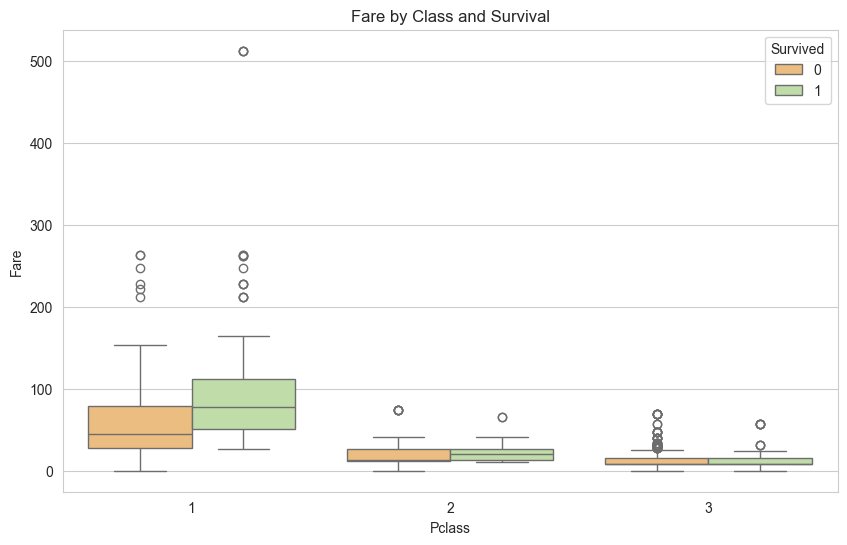

In [14]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Spectral')
plt.title('Fare by Class and Survival')
plt.show()


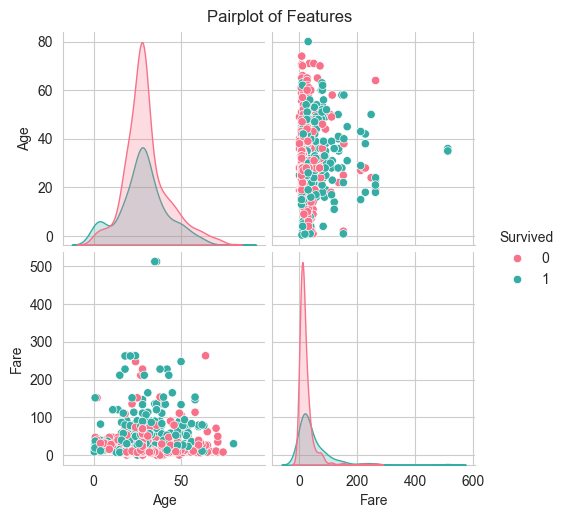

In [15]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='husl')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


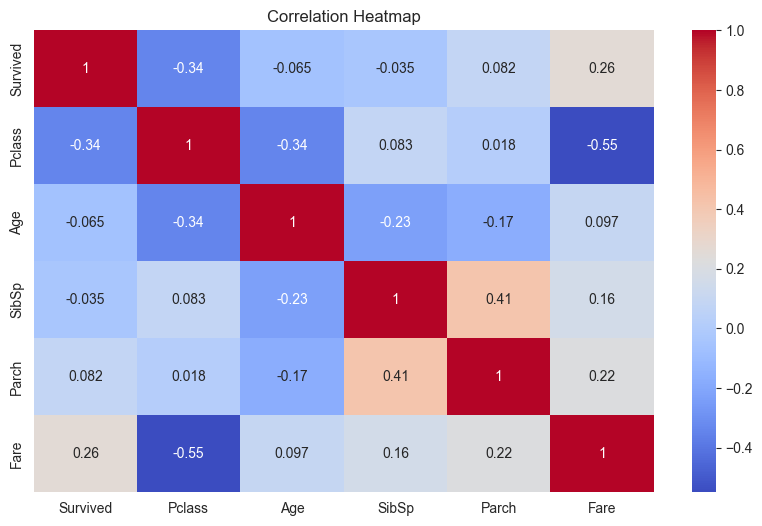

In [16]:
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [17]:
# Survival rate by Pclass
print("Survival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean().round(2))

# Survival rate by Sex
print("\nSurvival rate by Sex:")
print(df.groupby('Sex')['Survived'].mean().round(2))

# Survival rate by Embarked
print("\nSurvival rate by Embarked:")
print(df.groupby('Embarked')['Survived'].mean().round(2))


Survival rate by Pclass:
Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

Survival rate by Sex:
Sex
female    0.74
male      0.19
Name: Survived, dtype: float64

Survival rate by Embarked:
Embarked
C    0.55
Q    0.39
S    0.34
Name: Survived, dtype: float64


C:\Users\nihal\AppData\Local\Temp\ipykernel_23232\2666347906.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean().round(2))
C:\Users\nihal\AppData\Local\Temp\ipykernel_23232\2666347906.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sex')['Survived'].mean().round(2))
C:\Users\nihal\AppData\Local\Temp\ipykernel_23232\2666347906.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

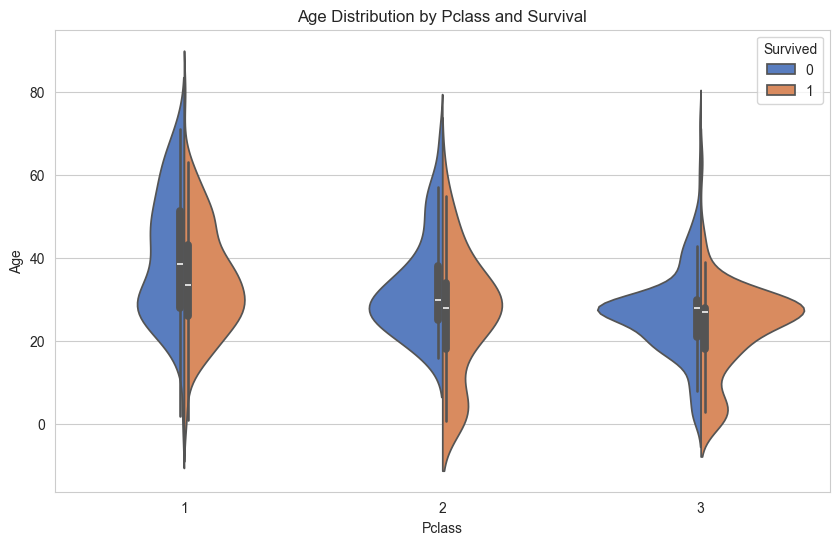

In [18]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='muted')
plt.title('Age Distribution by Pclass and Survival')
plt.show()


c:\Users\nihal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\nihal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\nihal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


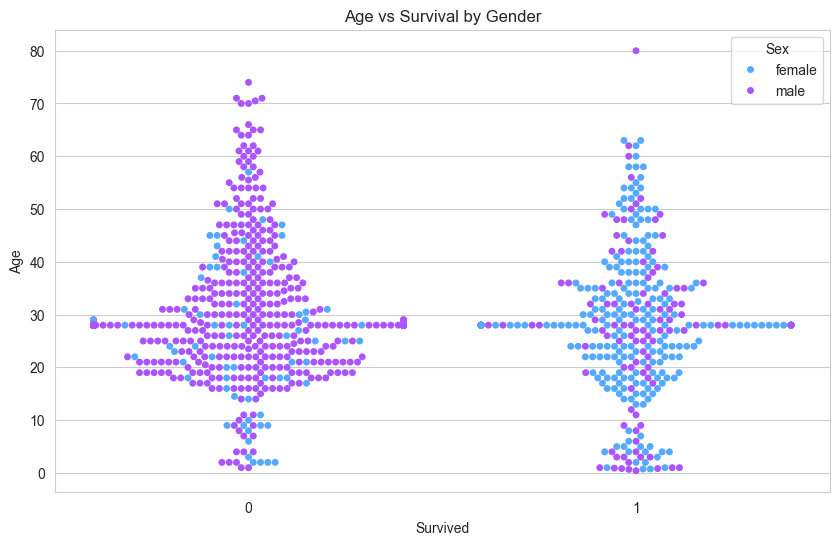

In [19]:
sns.swarmplot(x='Survived', y='Age', data=df, hue='Sex', palette='cool')
plt.title('Age vs Survival by Gender')
plt.show()


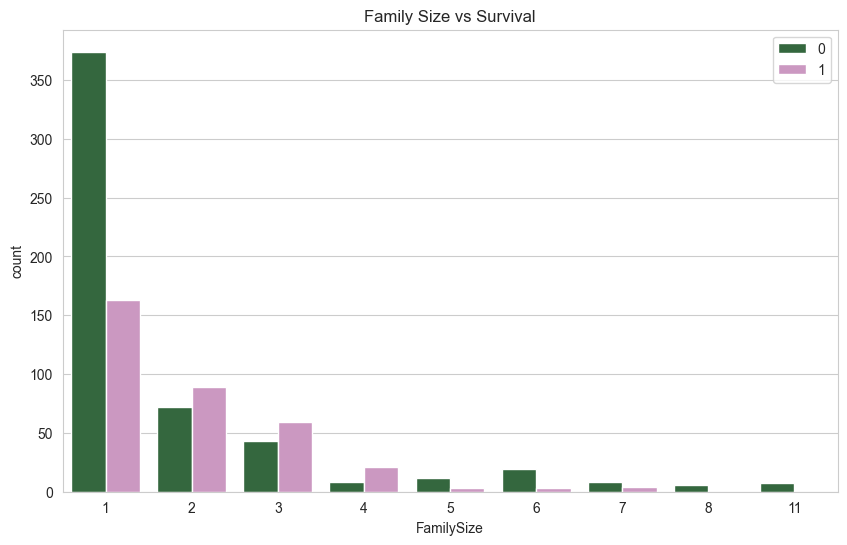

In [22]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=df, palette='cubehelix')
plt.title('Family Size vs Survival')
plt.legend()
plt.show()


In [21]:
df.to_csv('titanic_cleaned.csv', index=False)
print("✔️ Cleaned dataset saved as 'titanic_cleaned.csv'")


✔️ Cleaned dataset saved as 'titanic_cleaned.csv'
